Boston Housing dataset loaded successfully!
Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188
[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]
Successfully shuffled and split the data!
Successfully performed a metric calculation!
Successfully fit a model!
Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .
Creating a model complexity graph. . . 


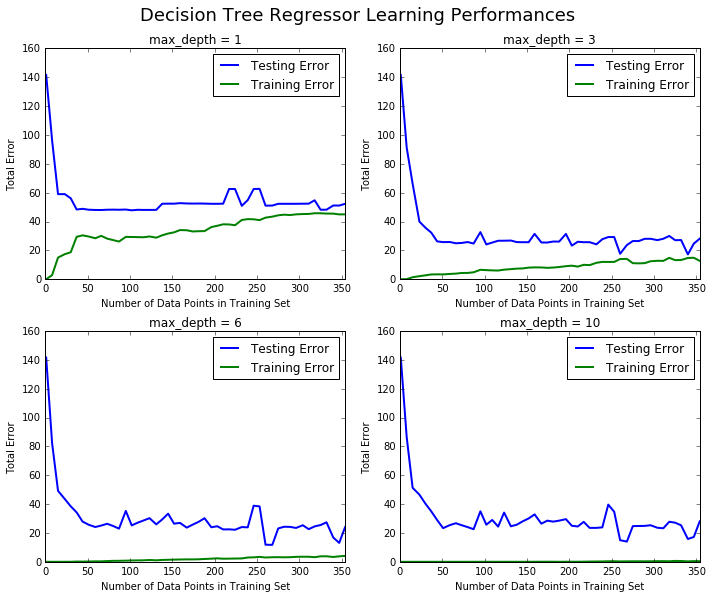

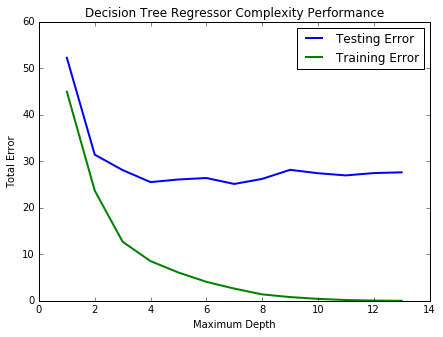

Final model optimal parameters: {'max_depth': 7}
Predicted value of client's home: 19.997


In [7]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

# Make matplotlib show our plots inline (nicely formatted in the notebook)
#%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()



# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

# Number of houses in the dataset
total_houses = housing_prices.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = np.amin(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.amax(housing_prices)

# Mean house value of the dataset
mean_price = np.average(housing_prices)
# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

print CLIENT_FEATURES

# Put any import statements you need for this code block here
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    # Shuffle and split the data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, train_size=0.7,random_state=0)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."
    
    
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error =mean_squared_error(y_true, y_predict) 
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."
    
# Put any import statements you need for this code block

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric,greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, param_grid=parameters,scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."
    
    
    
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()
    
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()
    
learning_curves(X_train, y_train, X_test, y_test)

model_complexity(X_train, y_train, X_test, y_test)


print "Final model optimal parameters:", reg.best_params_

sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Question 1
As a reminder, you can view a description of the Boston Housing dataset here, where you can find the different features under Attribute Information. The MEDV attribute relates to the values stored in our housing prices variable, so we do not consider that a feature of the data.
Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.

**Answer: **
One is RM, average number of rooms per dwelling. Number of rooms is always important for people buying a house. Because that would decide whether the house would meet the expect function from buyers such as people can set-up different room for gaming and film watching and could hold as many kids as possible.

the second one is DIS, weighted distances to five Boston employment centers. This one is also important because that would decide the commute time the house owner would spend.

the third one is LSTAT, percentage of owner status of the population. This would define the average quality of neighborhood and probably decide the safe level of a community.

Question 2
Using your client's feature set CLIENT_FEATURES, which values correspond with the features you've chosen above?
Hint: Run the code block below to see the client's data.

**Answer: ** 
5.60; 1.385, 12.13

##Question 3
*Why do we split the data into training and testing subsets for our model?

**Answer: **
Because we want to build a model that could make successfully prediction in the future. That means the model is important. As we cannot acquire data from future, it is import to well use data that already collected well at hand. So we spilt out data in training and testing. Training is to use to establish a model and the testing subset is used to validate the prediction model and fine tune the parameters of established model.


Question 4
Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?
•	Accuracy
•	Precision
•	Recall
•	F1 Score
•	Mean Squared Error (MSE)
•	Mean Absolute Error (MAE)
**Answer: **
In this project I believe Mean Squared Error would be the best solution. The MSE emphasizes large errors. In this case, minimal errors are expected to evaluated. Thus the MSE would be ideal in this analysis.

Question 5
What is the grid search algorithm and when is it applicable?
**Answer: **
Grid search helps in parameter tuning and the selection of appropriate model based on the parameters we wish to tune. While computing this, it also implements cross validation folds, thus eliminating the risk of overfitting/underfitting. It also has the flexibility of making a customized scorer function.

Question 6
What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?
**Answer: ** 
Cross-validation is a method to define a dataset to "test" the model in the training phase to avoid problems such as overfitting. The way cross-validation work is to separate the dataset in to k, no-overlapping, subsets. Each subset would share same data distribution. Then the k-1 subsets would be randomly pick as training set while the rest one is the test set. Thus k training/test combinations is acquired and we can perform k times training/testing and return the average result from the k times training/testing. 

Gird search performs 3-fold cross validation; hence we can easily validate the optimized parameter model generated by it. Cross validation ensures that we have a sufficiently good model and that we don't over or underfit the data in any way. Since, the grid search provides parameter optimization and uses cross validation to provide the optimal parameters, we can be sure that there are no significant problems of underfitting or overfitting.

Question 7
Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?
**Answer: ** 
Let us choose the graph with max depth 3. In this case the error relative low compare with the max depth of 1, showing a better performance with expand tree. The training error increase gently increase. The cause of increase is that when the data size is small the learning method would be overfitting. With data size increase the overfitting would be eased and the error would increase. 
In the test error. While the test set is small, the test data to our model is underfit. When test size increased, the test data would give a much better error score because the test data would have similar data structure with training data. In the graph we can see the test error decrease dramatically when test size when the test size is from 0 to 50. When the test size is over 50, the test error tends to stand level due to the model can fit test data better. 

Question 8
Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?
**Answer: ** 
With a max depth of 1, the model is underfitting the dataset. The error in training set and test set are both high at about the same level. Because with max depth 1, the tree would not expand and the learning value is restricted. 

With max depth of 10, an overfitting case is shown with the graph. In the training curve, we can see the error is a flat line that very close to 0. This shows that the model is overfitting to the training data. As this overfitted model apply to the test data. When the test size is 50 to 200, the error score is relatively fine. However, when the test size is over 200, a perturbation is observed. This would indication the model lack of generalization.  
Question 9
From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?
**Answer: **
As the max depth increases, the training and testing error both decreases. For training, the training error decreases much faster because with expanded tree we increase the entropy levels. While the max depth is too high, the learning method would be overfitting to the training data. Thus we see the training error is down to 0 when the max depth is higher than 12. 
For test data, at low max depth, the error is high also because the underfitting. With the depth increases, the error decrease and the curve flatted at about max depth 4. The reason that the test error would not be 0 is that the model is overfitting to the training data only. While the ma depth is too high the test error would be even higher because the model is overfitting to training data and thus the model would not perform well to other data.

I think a max depth 6 fit the dataset the best. It doesn't overfit as in the case of higher depths. From the graph we see that the test error is about 20 with data size increase and model complexity increase. And the training error is not 0 that means that model with max depth 6 is general to the housing data. We can apply other housing data to this model. When the max depth is 10, the training error is 0 and that means the model lack to general property and overfit to the training data. The model complexity graph verifies the above conclusion

Question 10
Using grid search on the entire dataset, what is the optimal max_depth parameter for your model? How does this result compare to your initial intuition?
**Answer: ** 
The optimal max depth is 7. It close to my expectation.

Question 11
With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?
**Answer: **
The price with model prediction is 19,997 dollars.  This price is close to the median price. This means the model generated here is reliable. 

Question 12 (Final Question):
In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.

**Answer: **

This model using various features to evaluate the house price. It used decision tree method. And we used grid search and cross-validation to verify the model. From the learning curving we can see the error is better and I believe the model can well predict the house price.
